Author: Vera Lake
Class: D212 - Task 2 - Dimensionality Reduction Methods 

# Scenario: Telecommunications Churn
One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term. 

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.

# Data File Being Used:
churn_clean.csv

# Part I: Research Question

## A.  Describe the purpose of this data mining report by doing the following:

### A.1  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).
*Rubric: The submission proposes 1 question answered using PCA that is relevant to a real-world organizational situation.*

Can we reduce the dimensionality of the churn data in order to reduce the work on our existing models and the hardware on our computers at TeleCo?

### A.2 Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*Rurbic: The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.*

One goal of the data analysis to determine if we can reduce the dimensionality of the data set to improve run time on our existing models.

# Part II: Method Justification

## B.  Explain the reasons for using PCA by doing the following:

### B.1 Explain how PCA analyzes the selected data set. Include expected outcomes.
*Rubric: The submission logically explains how PCA analyzes the selected dataset and includes accurate expected outcomes.*

Source: https://www.mlstack.cafe/blog/principal-component-analysis-interview-questions

"PCA is an operation applied to a dataset, represented by an n x m matrix A that results in a projection of A which we will call B. This operation is calculated using the tools of linear algebra."

### B.1 Summarize one assumption of PCA.
*Rubric: The submission adequately summarizes 1 assumption of PCA.*
Source: https://stats.oarc.ucla.edu/spss/seminars/efa-spss/#:~:text=common%20factor%20analysis.-,Principal%20Components%20Analysis,into%20common%20and%20unique%20variance.

PCA makes the assumption that there is no unique variance and the total variance is equal to common variance.

# Part III: Data Preparation

## C.  Perform data preparation for the chosen dataset by doing the following:

### C.1  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.
*Rubric: The submission accurately identifies the continuous dataset variables needed to answer the PCA question from part A1.*
- Population_Within_A_Mile
- Children_Count
- Age
- Income
- Outage_Seconds_Per_Week
- Email_Sent_To_Customer_Count
- Technical_Support_Contacted_Count
- Yearly_Equip_Failure_Count
- Tenure

### C.2  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.
*Rubric: The submission accurately standardizes the continuous dataset variables identified in part C1 and includes a cleaned dataset.*

In [1]:
# Data Exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Preparation and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [3]:
# Read the raw data
churn_data = pd.read_csv('./Churn Data/churn_clean.csv', index_col=0)

In [4]:
# Look at the data we have
churn_data.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
# Look at the data we have
churn_data.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
# Drop unecessary columns
churn_data.drop(['Customer_id', 'UID', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [7]:
# Data Preparation Step 1: Rename features for clarity
churn_data = churn_data.rename(columns={
    "Employment": "Employment_Status", 
    "Marital":"Marital_Status", 
    "Outage_sec_perweek": "Outage_Seconds_Per_Week", 
    "Contacts": "Technical_Support_Contacted_Count",
    "Techie": "Is_Techie",
    "Contract": "Contract_Term",
    "Port_modem": "Has_Port_Modem",
    "Tablet": "Has_Tablet",
    "InternetService": "Internet_Service_Type",
    "Phone":"Has_Phone_Service",
    "Multiple":"Has_Multiple_Lines",
    "OnlineSecurity": "Has_Online_Security",
    "OnlineBackup": "Has_Online_Backup",
    "DeviceProtection": "Has_Device_Protection",
    "TechSupport":"Has_Tech_Support",
    "StreamingTV": "Has_Streaming_TV",
    "StreamingMovies": "Has_Streaming_Movies",
    "PaperlessBilling": "Has_Paperless_Billing",
    "PaymentMethod": "Payment_Method_Type",
    "Population": "Population_Within_A_Mile",
    "Children": "Children_Count",
    "Email": "Email_Sent_To_Customer_Count",
    "Yearly_equip_failure": "Yearly_Equip_Failure_Count",
    "MonthlyCharge": "Avg_Monthly_Charge",
    "Bandwidth_GB_Year": "Avg_Bandwidth_GB_Usage_Per_Year"
})
churn_data.head(1)
# Data Preparation Step 2: Look at the data we have

,Population_Within_A_Mile,Area,Children_Count,Age,Income,Marital_Status,Gender,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,...,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Payment_Method_Type,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611


In [8]:
# This is what we are keeping for the PCA
continuous_features = churn_data[[
    'Population_Within_A_Mile',
    'Children_Count',
    'Age',
    'Income',
    'Outage_Seconds_Per_Week',
    'Email_Sent_To_Customer_Count',
    'Technical_Support_Contacted_Count',
    'Yearly_Equip_Failure_Count',
    'Tenure'
]]

<AxesSubplot:ylabel='CaseOrder'>

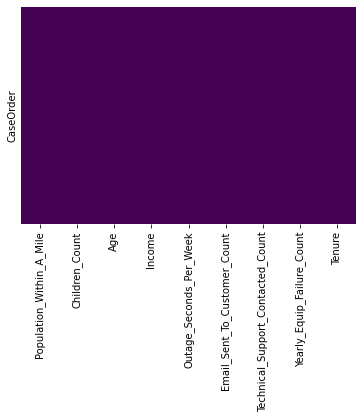

In [9]:
# Data Preparation Step 3: Check for any null data and address accordingly
# create heat map to visualize missing data
# the yellow bars stands for null points
sns.heatmap(continuous_features.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
churn_data = continuous_features

In [11]:
# Data Preparation Step 5: Normalize the features
# noramlize the data by scaling
sc = StandardScaler()
sc.fit(churn_data)
scaled_data_array = sc.transform(churn_data)
scaled_features = pd.DataFrame(scaled_data_array, columns = churn_data.columns)
scaled_features.head()

,Population_Within_A_Mile,Children_Count,Age,Income,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Tenure
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551


# Part IV: Analysis

## D.  Perform PCA by doing the following:

### D.1  Determine the matrix of all the principal components.
*Rubric: The submission accurately determines the matrix of all of the principal components*

In [12]:
pca_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
pca = PCA(n_components=scaled_features.shape[1])
pca.fit(scaled_features)
pca_df = pd.DataFrame(pca.transform(scaled_features),
         columns = pca_columns)

To assess how much weightings each feature will have in later predictions, we could construct a loadings table. The loadings shows how much each of our original features have contributed to each of the “new features” — the principal components.

In [13]:
# PCA loadings - weights of the features in relation to PCs
loadings = pd.DataFrame(pca.components_.T,
                       columns = pca_columns,
                       index=scaled_features.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Population_Within_A_Mile,-0.278933,-0.332060,-0.002794,0.476272,0.399332,0.051934,0.629414,0.158219,-0.041607
Children_Count,0.563319,-0.091982,0.207418,0.207362,0.258958,-0.188057,-0.175135,0.422638,0.525804
Age,-0.546042,0.237643,-0.244420,0.212598,0.113645,0.052051,-0.268771,-0.171852,0.650407
Income,0.219921,0.265615,-0.194148,-0.357405,0.756283,-0.056235,0.118138,-0.353423,-0.040760
Outage_Seconds_Per_Week,-0.107427,-0.154656,0.822251,-0.088311,0.027755,-0.004349,0.059607,-0.487988,0.195376
Email_Sent_To_Customer_Count,-0.105325,-0.556796,-0.084617,0.187469,0.284285,-0.194456,-0.627194,-0.161262,-0.313960
Technical_Support_Contacted_Count,-0.443562,-0.022906,0.252520,-0.525838,0.261271,0.092390,-0.137917,0.603617,-0.047790
Yearly_Equip_Failure_Count,0.068776,0.451674,0.273977,0.431708,0.195968,0.561759,-0.266448,0.072471,-0.315598
Tenure,-0.185014,0.464516,0.193517,0.226736,0.018487,-0.770794,0.005541,0.090330,-0.241827



### D.2  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.
*Rubric: The submission accurately identifies the total number of principal components, and the submission uses the elbow rule or the Kaiser criterion and includes a screenshot.*

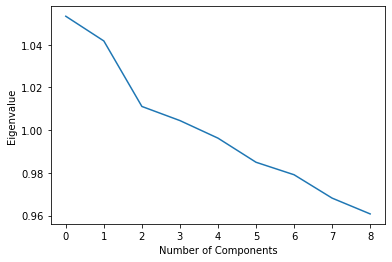

In [14]:
# Kaiser Rule retain PCs with eigenvalues (the strength of the transformation in the direction of eigenvector) greater than 1
# Create scree plots of eigenvalues to examine and determine which PCs should be retained
# Resource: https://wgu.webex.com/recordingservice/sites/wgu/recording/1bab06e9d1541039aabb00505681a06f/playback

# Extract eigenvalues
cov_matrix = np.dot(scaled_features.T, scaled_features) / pca_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Plot the eiganvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

PC1 - PC4 have Eigenvalues greater than 1 and should be retained.

### D.3 Identify the variance of each of the principal components identified in part D2.
*Rubric: The submission accurately identifies the variance of each of the principal components identified in part D2.*
Source: https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [15]:
print("Variance explained by all 9 prinicple components =", 
     sum(pca.explained_variance_ratio_ * 100))

Variance explained by all 9 prinicple components = 100.0


In [16]:
individual_pca_variance = pca.explained_variance_ratio_ * 100
counter = 1
for component in pca.components_.T:
    print("Variance explianed by Principle Component", counter, "=", individual_pca_variance[counter-1])
    counter = counter+1

Variance explianed by Principle Component 1 = 11.703762439136202
Variance explianed by Principle Component 2 = 11.575178639854975
Variance explianed by Principle Component 3 = 11.234406573870729
Variance explianed by Principle Component 4 = 11.160958941920818
Variance explianed by Principle Component 5 = 11.06955883676986
Variance explianed by Principle Component 6 = 10.944124930217892
Variance explianed by Principle Component 7 = 10.879118810553685
Variance explianed by Principle Component 8 = 10.757549374688738
Variance explianed by Principle Component 9 = 10.675341452987098


### D.4 Identify the total variance captured by the principal components identified in part D2.
*Rubric: The submission accurately identifies the total variance captured by the principal components identified in part D2.*

The first component alone captures about 11.7% of the variability in the dataset and the second component alone captures about 11.5% of the variability in the dataset and so on. Also, note that the values of the above array are sorted in descending order. Taking the sum of the above array will return the total variance explained by each of the selected components.

In [17]:
# Cumulative sum of variance
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 11.70376244,  23.27894108,  34.51334765,  45.67430659,
        56.74386543,  67.68799036,  78.56710917,  89.32465855,
       100.        ])

In [18]:
counter = 1
for component in pca.components_.T:
    print("Variance explianed by Principle Component", counter, "=", np.cumsum(pca.explained_variance_ratio_ * 100)[counter-1])
    counter = counter+1

Variance explianed by Principle Component 1 = 11.703762439136202
Variance explianed by Principle Component 2 = 23.278941078991178
Variance explianed by Principle Component 3 = 34.51334765286191
Variance explianed by Principle Component 4 = 45.67430659478273
Variance explianed by Principle Component 5 = 56.743865431552585
Variance explianed by Principle Component 6 = 67.68799036177047
Variance explianed by Principle Component 7 = 78.56710917232417
Variance explianed by Principle Component 8 = 89.3246585470129
Variance explianed by Principle Component 9 = 100.0


### D.5 Summarize the results of your data analysis.
*Rubric: The submission adequately summarizes the results of the data analysis.*
Source: https://www.mlstack.cafe/blog/principal-component-analysis-interview-questions

PC1 - PC4 
- have Eigenvalues greater than 1 and should be retained
- account for 45.67% of the variability in the churn data
- do not account for enough of the data in order to reduce dimensionality for modeling and therefor it is recommended to use the churn data without the PCA for existing models used in analysis for TeleCo.

# Part V: Attachments

## E.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
*Rubric: The submission records all web sources used to acquire data or segments of third-party code, and the web sources are reliable.*

https://wgu.webex.com/recordingservice/sites/wgu/recording/1bab06e9d1541039aabb00505681a06f/playback

## F.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
*Rubric: The submission includes in-text citations for sources that are properly quoted, paraphrased, or summarized and a reference list that accurately identifies the author, date, title, and source location as available.*

https://www.mlstack.cafe/blog/principal-component-analysis-interview-questions
 

## G.  Demonstrate professional communication in the content and presentation of your submission.
*Rubric: Content reflects attention to detail, is organized, and focuses on the main ideas as prescribed in the task or chosen by the candidate. Terminology is pertinent, is used correctly, and effectively conveys the intended meaning. Mechanics, usage, and grammar promote accurate interpretation and understanding.*